In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -q -U keras-tuner

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
# import keras models
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
import tensorflow as tf

In [ ]:
# set random seed globally
my_seed = 21
from numpy.random import seed
seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed) 
# tensorflow version
print(tf.__version__)

2.11.0


In [ ]:
# import fashion mnst dataset
from keras.datasets import fashion_mnist

In [ ]:
# Set the total number of classes
nb_classes = 10

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.min(), X_train.max()

(0.0, 1.0)

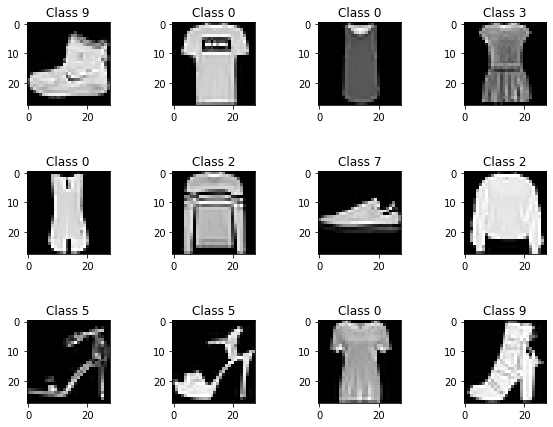

In [ ]:
# inspect your data
from matplotlib.pyplot import figure
plt.figure(figsize= (10,7))
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.subplots_adjust(hspace=0.8)
    plt.imshow(X_train[ii], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[ii]))

In [ ]:
def buildSequentialModel(hp):
    # Build a Sequential Model.
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
     
    ##- Input Layer and First Hidden Layer
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=700, step=50)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=500, step=50)
    #hp_dropout = hp.Choice(name= 'dropout', values = [[0.0],[0.05],[0.1],[0.15],[0.2],[0.25],[0.3]])
    
    
    model.add(Dense(units=hp_layer_1, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout('dropout'))
    model.add(Dense(units=hp_layer_2, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(units=hp_layer_3, kernel_initializer='normal', activation='relu'))

    
    #model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    # Output Layer
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  
    return model

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(buildSequentialModel,
                     objective='val_accuracy')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
tuner.search(X_train, y_train, batch_size=1024,epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 246 Complete [00h 00m 32s]
val_accuracy: 0.5640000104904175

Best val_accuracy So Far: 0.8979166746139526
Total elapsed time: 00h 17m 51s


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),
                    callbacks=[stop_early])

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3258 - accuracy: 0.9125 - val_loss: 0.1681 - val_accuracy: 0.9524
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1304 - accuracy: 0.9631 - val_loss: 0.1195 - val_accuracy: 0.9634
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0861 - accuracy: 0.9754 - val_loss: 0.0948 - val_accuracy: 0.9714
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0607 - accuracy: 0.9827 - val_loss: 0.0940 - val_accuracy: 0.9722
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0446 - accuracy: 0.9873 - val_loss: 0.0849 - val_accuracy: 0.9753
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.0788 - val_accuracy: 0.9758
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0224 - accuracy: 0.9942 - val_loss: 0.0755 - val_accuracy:

In [ ]:
history.history

{'accuracy': [0.9125000238418579,
  0.9630833268165588,
  0.9754166603088379,
  0.9826874732971191,
  0.9873124957084656,
  0.9913958311080933,
  0.9942291378974915,
  0.9959791898727417,
  0.9966458082199097,
  0.9976875185966492],
 'loss': [0.3257654905319214,
  0.13043266534805298,
  0.08612470328807831,
  0.06069627031683922,
  0.04457419738173485,
  0.031559739261865616,
  0.022377487272024155,
  0.01674342155456543,
  0.012683684006333351,
  0.009827525354921818],
 'val_accuracy': [0.9524166584014893,
  0.9634166955947876,
  0.9714166522026062,
  0.9722499847412109,
  0.9752500057220459,
  0.9757500290870667,
  0.9783333539962769,
  0.9753333330154419,
  0.9765833616256714,
  0.9785000085830688],
 'val_loss': [0.16807805001735687,
  0.11949089914560318,
  0.09482535719871521,
  0.09396205842494965,
  0.08494479954242706,
  0.07883040606975555,
  0.07549740374088287,
  0.08532540500164032,
  0.08558475971221924,
  0.080709308385849]}

In [ ]:
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.325765,0.912500,0.168078,0.952417
1,0.130433,0.963083,0.119491,0.963417
2,0.086125,0.975417,0.094825,0.971417
3,0.060696,0.982687,0.093962,0.972250
4,0.044574,0.987312,0.084945,0.975250
5,0.031560,0.991396,0.078830,0.975750
6,0.022377,0.994229,0.075497,0.978333
7,0.016743,0.995979,0.085325,0.975333
8,0.012684,0.996646,0.085585,0.976583
9,0.009828,0.997688,0.080709,0.978500


In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model